In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

import torch
import torch.nn as nn

from model.model import SwinTransformer
from data.dataset import CustomDataset


In [6]:
file_path = '/home/sajjad/Desktop/Face_Classification/data'
labels = 'label_train.txt'


nb_images = 111430
nb_test_images = 10130
width = 56  
height = 56  
channels = 3
data_augment = False

# Load the data
with open(f"{file_path}/db_train.raw", 'rb') as file:
    data = file.read()

labels = np.loadtxt(f"{file_path}/label_train.txt", dtype=np.int8)
data = np.frombuffer(data, dtype=np.uint8).reshape(nb_images, height, width, channels)

In [7]:
count_0 = np.sum(labels == 0)
count_1 = np.sum(labels == 1)

print(f"Number of 0s: {count_0}")
print(f"Number of 1s: {count_1}")


Number of 0s: 15250
Number of 1s: 96180


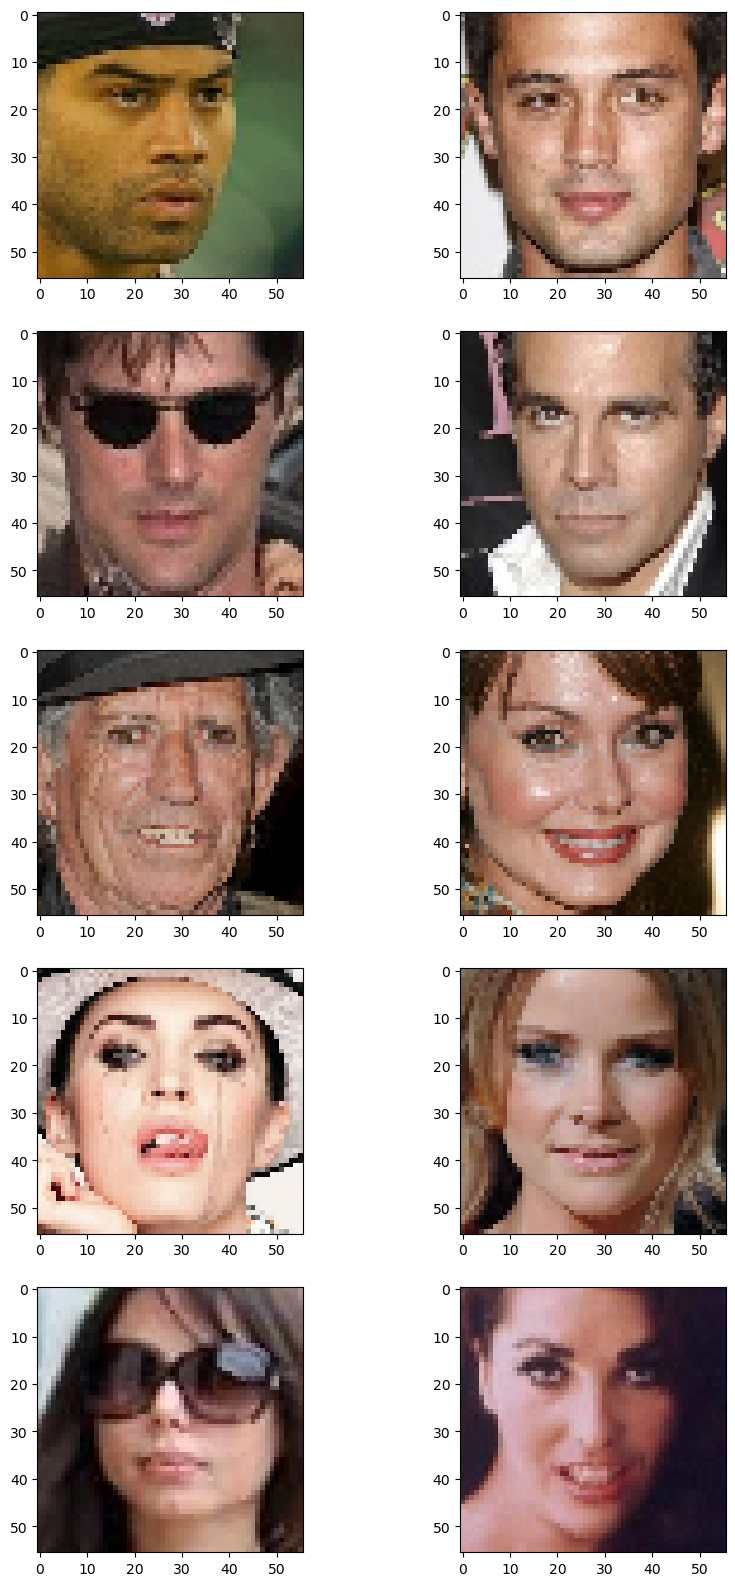

In [8]:
#Display some images of each class using matplotlib

where_0 = np.where(labels == 0)[0]
where_1 = np.where(labels == 1)[0]

fig = plt.figure(figsize=(10,20))
idx = 1
nb_ph = 5
for label0, label1 in zip(where_0[:nb_ph], where_1[:nb_ph]):
    ax = fig.add_subplot(nb_ph, 2, idx)
    plt.imshow(data[label0])
    idx+=1
    ax = fig.add_subplot(nb_ph, 2, idx)
    plt.imshow(data[label1])
    idx+=1
plt.show()



### Model Architecture

Here, I aim to depict the structure of the Swing Transformer, drawing inspiration from the original paper available at this link https://arxiv.org/abs/2103.14030

You can find the model implementation in ```model.model_V2```

In [10]:
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

In [12]:
from torchinfo import summary
# Prepare the model 
with open(f'{"model_N5"}_params.pkl', 'rb') as file :
    params = pickle.load(file)
device = params['device']
dtype = torch.float32

model = SwinTransformer(params).to(dtype = dtype, device= device)

/home/sajjad/anaconda3/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [13]:
# Architecture of the model
summary(model, input_size=[1, width, height, channels])

Layer (type:depth-idx)                             Output Shape              Param #
SwinTransformer                                    [1, 2]                    19,299
├─PatchEmbedding: 1-1                              [1, 28, 28, 48]           --
│    └─Conv2d: 2-1                                 [1, 48, 28, 28]           624
│    └─LayerNorm: 2-2                              [1, 784, 48]              96
├─StageModule: 1-2                                 [1, 28, 28, 48]           --
│    └─ModuleList: 2-3                             --                        --
│    │    └─ModuleList: 3-1                        --                        37,686
│    │    └─ModuleList: 3-2                        --                        37,686
├─ModuleList: 1-5                                  --                        (recursive)
│    └─Down_Sampling: 2-4                          [1, 14, 14, 96]           --
│    │    └─LayerNorm: 3-3                         [1, 14, 14, 192]          384
│    │    └─

For model training, you can refer to the code in the ```scripts/script_training.py``` script. For performing inference, please consult the ``scripts/script_inference.py`` script, which also includes the capability to save the requested ``predictions.txt`` file.

The training history and presentation of various metrics throughout the training process on both the training and validation sets have been meticulously documented using **TensorBoard**. You can conveniently visualize these metrics by running the following command in the terminal from the original directory: ``tensorboard --logdir=runs``

The model weights and parameters have been saved for future use.